#### 載入資料檔案並轉矩陣

In [25]:
def file2matrix(path, delimiter):
    recordList = []
    fp = open(path, 'r')
    content = fp.read()
    fp.close()
    rowlist = content.splitlines()
    recordlist = [list(map(eval, row.split(delimiter))) for row in rowlist if row.strip()]
    return mat(recordlist)

#### 繪製分類點

In [38]:
def drawScatterbyLabel(plt, Input):
    m,n = shape(Input)
    target = Input[:, -1]
    for i in range(m):
        if target[i] == 0:
            plt.scatter(Input[i,0],Input[i,1],c='blue',marker='o')
        else:
            plt.scatter(Input[i,0],Input[i,1],c='red',marker='s')

#### 建置B+X矩陣, 預設B為全1的列向量

In [20]:
def buildMat(dataSet):
    m,n = shape(dataSet)
    dataMat = zeros((m,n))
    dataMat[:,0] = 1
    dataMat[:,1:] = dataSet[:,:-1]
    return dataMat

#### Logistic函數如下

In [5]:
def logistic(wTx):
    return 1.0/(1.0+exp(-wTx))

#### 主程式

In [7]:
# -*- coding: utf-8 -*-
import os, sys
import numpy as np
from numpy import *
import matplotlib.pyplot as plt

In [26]:
#reload(sys)
import sys
#sys.setdefaultencoding('utf-8')
print(sys.stdout.encoding)
Input = file2matrix("testSet.txt","\t")

UTF-8


In [28]:
labels = Input[:,-1]
[m,n] = shape(Input)
dataMat = buildMat(Input)

In [31]:
print(dataMat[:5])

[[  1.        -0.017612 -14.053064]
 [  1.        -1.395634  -4.662541]
 [  1.        -0.752157  -6.53862 ]
 [  1.        -1.322371  -7.152853]
 [  1.         0.423363 -11.054677]]


In [32]:
alpha = 0.001
steps = 500
weights = ones((n,1))
errorlist = []

In [36]:
for k in range(steps):
    net = dataMat*mat(weights)
    output = logistic(net)
    loss = output - labels
    error = 0.5*sum(multiply(loss,loss))
    errorlist.append(error)
    grad = dataMat.T*loss
    weights = weights - alpha*grad
print(weights)

[[ 4.17881308]
 [ 0.50489874]
 [ 0.61980264]]


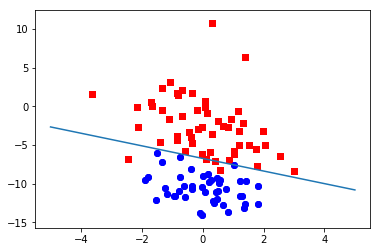

In [40]:
drawScatterbyLabel(plt,Input)
X = np.linspace(-5,5,100)
Y = -(double(weights[0])+X*(double(weights[1])))/double(weights[2])
plt.plot(X,Y)
plt.show()